In [2]:
#!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
#model = tf.keras.applications.ResNet50(include_top=True, weights = None , classes = 10)

### MNIST 데이터셋 다운로드하고 준비하기

In [3]:
from PIL import Image
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

im_size = 224

n_samples = 30000
tmp_labels = np.zeros(n_samples)
tmp_images = []

for i in range(n_samples):
    tmp_org = train_images[i]
    tmp = Image.fromarray(tmp_org)  
    tmp = tmp.resize((im_size, im_size))
    tmp = np.asarray(tmp)
    tmp = np.expand_dims(tmp, axis=-1)
    tmp = np.concatenate([tmp, tmp, tmp], axis = 2)
    
    tmp_images.append(np.expand_dims(tmp, axis=0))
    tmp_labels[i] = train_labels[i]
    
train_images = np.concatenate(tmp_images, axis=0)
train_labels = tmp_labels

n_samples = 1000
tmp_labels = np.zeros(n_samples)
tmp_images = []

for i in range(n_samples):
    tmp_org = test_images[i]
    tmp = Image.fromarray(tmp_org)  
    tmp = tmp.resize((im_size, im_size))
    tmp = np.asarray(tmp)
    tmp = np.expand_dims(tmp, axis=-1)
    tmp = np.concatenate([tmp, tmp, tmp], axis = 2)
    
    tmp_images.append(np.expand_dims(tmp, axis=0))
    tmp_labels[i] = test_labels[i]
    
test_images = np.concatenate(tmp_images, axis=0)
test_labels = tmp_labels

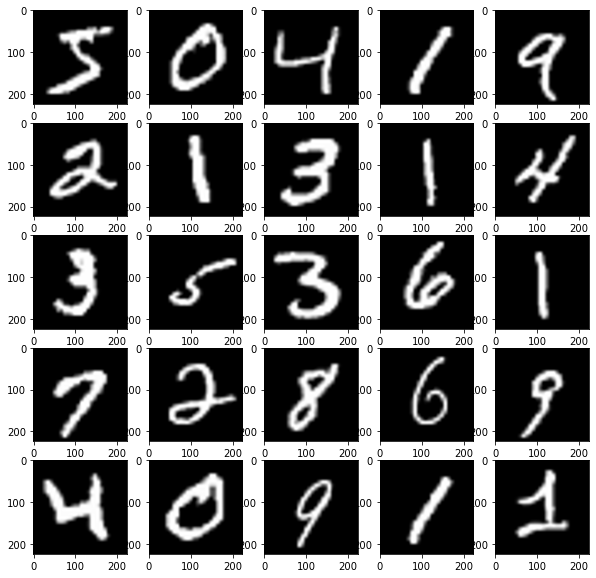

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    #plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
plt.show()

In [5]:
#model = tf.keras.applications.ResNet50(include_top=True, weights = 'imagenet' , classes = 1000)
#model = tf.keras.applications.VGG19(weights = None)
#model = tf.keras.applications.MobileNetV2(weights = None)

model = tf.keras.applications.ResNet50(include_top=True, weights = None, classes = 1000)
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

### 모델 컴파일과 훈련하기

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 모델 평가

In [7]:
model.fit(train_images,  train_labels, epochs=3, validation_data=(test_images, test_labels))

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
938/938 [==============================] - ETA: 0s - loss: 0.2439 - accuracy: 0.9306WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000023CB5CB69D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`)